## Dependencies

In [120]:
import random
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

%matplotlib inline

## Basic counts model without neural network features

In [121]:
words = open('data.txt', 'r').read().split()
len(words)

49061

In [122]:
words[:2]

['You', 'ever']

In [123]:
min( (len(word), word)  for word in words)

(1, ',')

In [124]:
max( (len(word), word)  for word in words)

(33, '(Ouuuuuuuuuuuuuuuuuuuuuuuuuuuuuh)')

In [125]:
ctoi = {ch : i for i, ch in enumerate(sorted(set("".join(words))))}
itoc = {v:k for k, v in ctoi.items()}

In [126]:
ctoi

{'!': 0,
 '"': 1,
 '&': 2,
 "'": 3,
 '(': 4,
 ')': 5,
 ',': 6,
 '-': 7,
 '.': 8,
 '0': 9,
 '1': 10,
 '2': 11,
 '3': 12,
 '4': 13,
 '8': 14,
 ':': 15,
 '?': 16,
 'A': 17,
 'B': 18,
 'C': 19,
 'D': 20,
 'E': 21,
 'F': 22,
 'G': 23,
 'H': 24,
 'I': 25,
 'J': 26,
 'K': 27,
 'L': 28,
 'M': 29,
 'N': 30,
 'O': 31,
 'P': 32,
 'Q': 33,
 'R': 34,
 'S': 35,
 'T': 36,
 'U': 37,
 'V': 38,
 'W': 39,
 'Y': 40,
 'a': 41,
 'b': 42,
 'c': 43,
 'd': 44,
 'e': 45,
 'f': 46,
 'g': 47,
 'h': 48,
 'i': 49,
 'j': 50,
 'k': 51,
 'l': 52,
 'm': 53,
 'n': 54,
 'o': 55,
 'p': 56,
 'q': 57,
 'r': 58,
 's': 59,
 't': 60,
 'u': 61,
 'v': 62,
 'w': 63,
 'x': 64,
 'y': 65,
 'z': 66,
 '´': 67,
 'É': 68,
 'â': 69,
 'è': 70,
 'é': 71,
 'ê': 72,
 '‘': 73,
 '’': 74,
 '“': 75,
 '”': 76,
 '…': 77}

In [127]:
min(itoc.items())


(0, '!')

In [128]:
counts_tensor = torch.zeros((78,78), dtype=torch.int32)

In [129]:
for word in words:
    for ch1, ch2 in zip(word, word[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        counts_tensor[idx1, idx2] += 1

In [130]:
counts_tensor

tensor([[1, 1, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.int32)

(-0.5, 77.5, 77.5, -0.5)

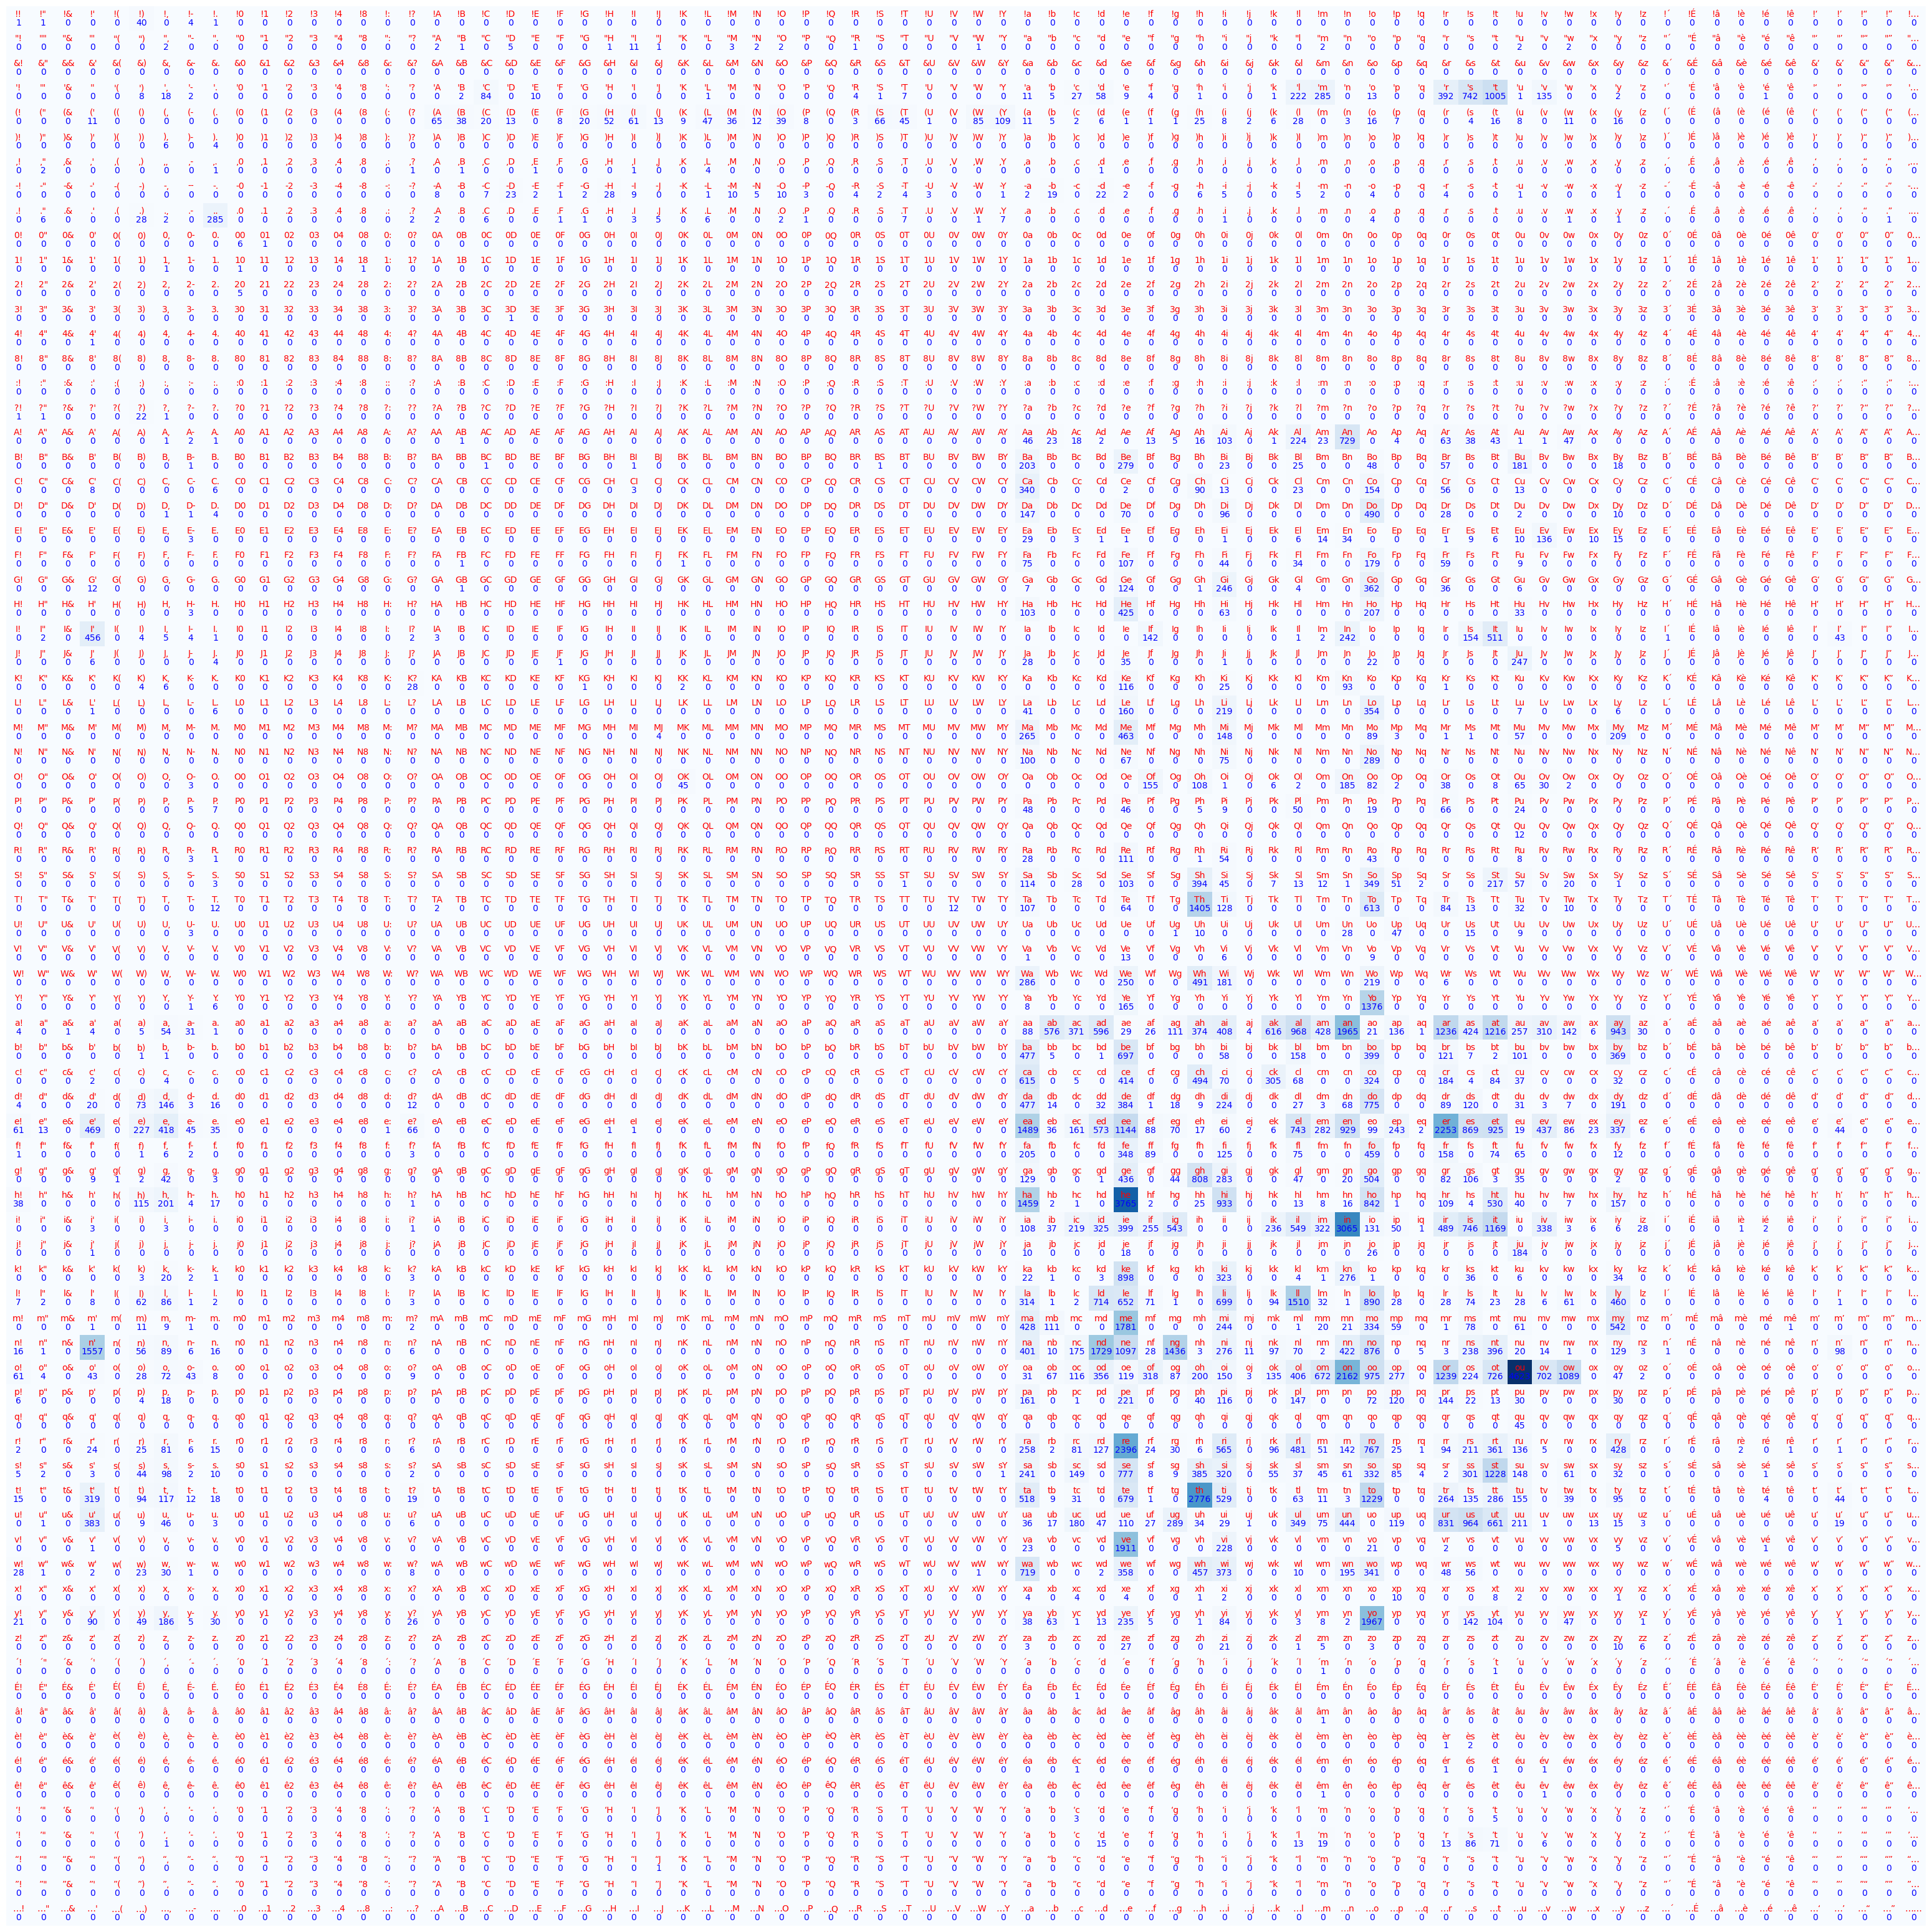

In [131]:
plt.figure(figsize=(40,40))
plt.imshow(counts_tensor, cmap='Blues')

for i in range(78):
    for j in range(78):
        chstr = itoc[i] + itoc[j]
        plt.text(j, i, str(chstr), ha='center', va='bottom', color='red')
        plt.text(j, i, counts_tensor[i, j].item(), ha='center', va='top', color='blue')
plt.axis('off')

In [133]:
normalized_counts_tensor = (counts_tensor + 1)

(-0.5, 77.5, 77.5, -0.5)

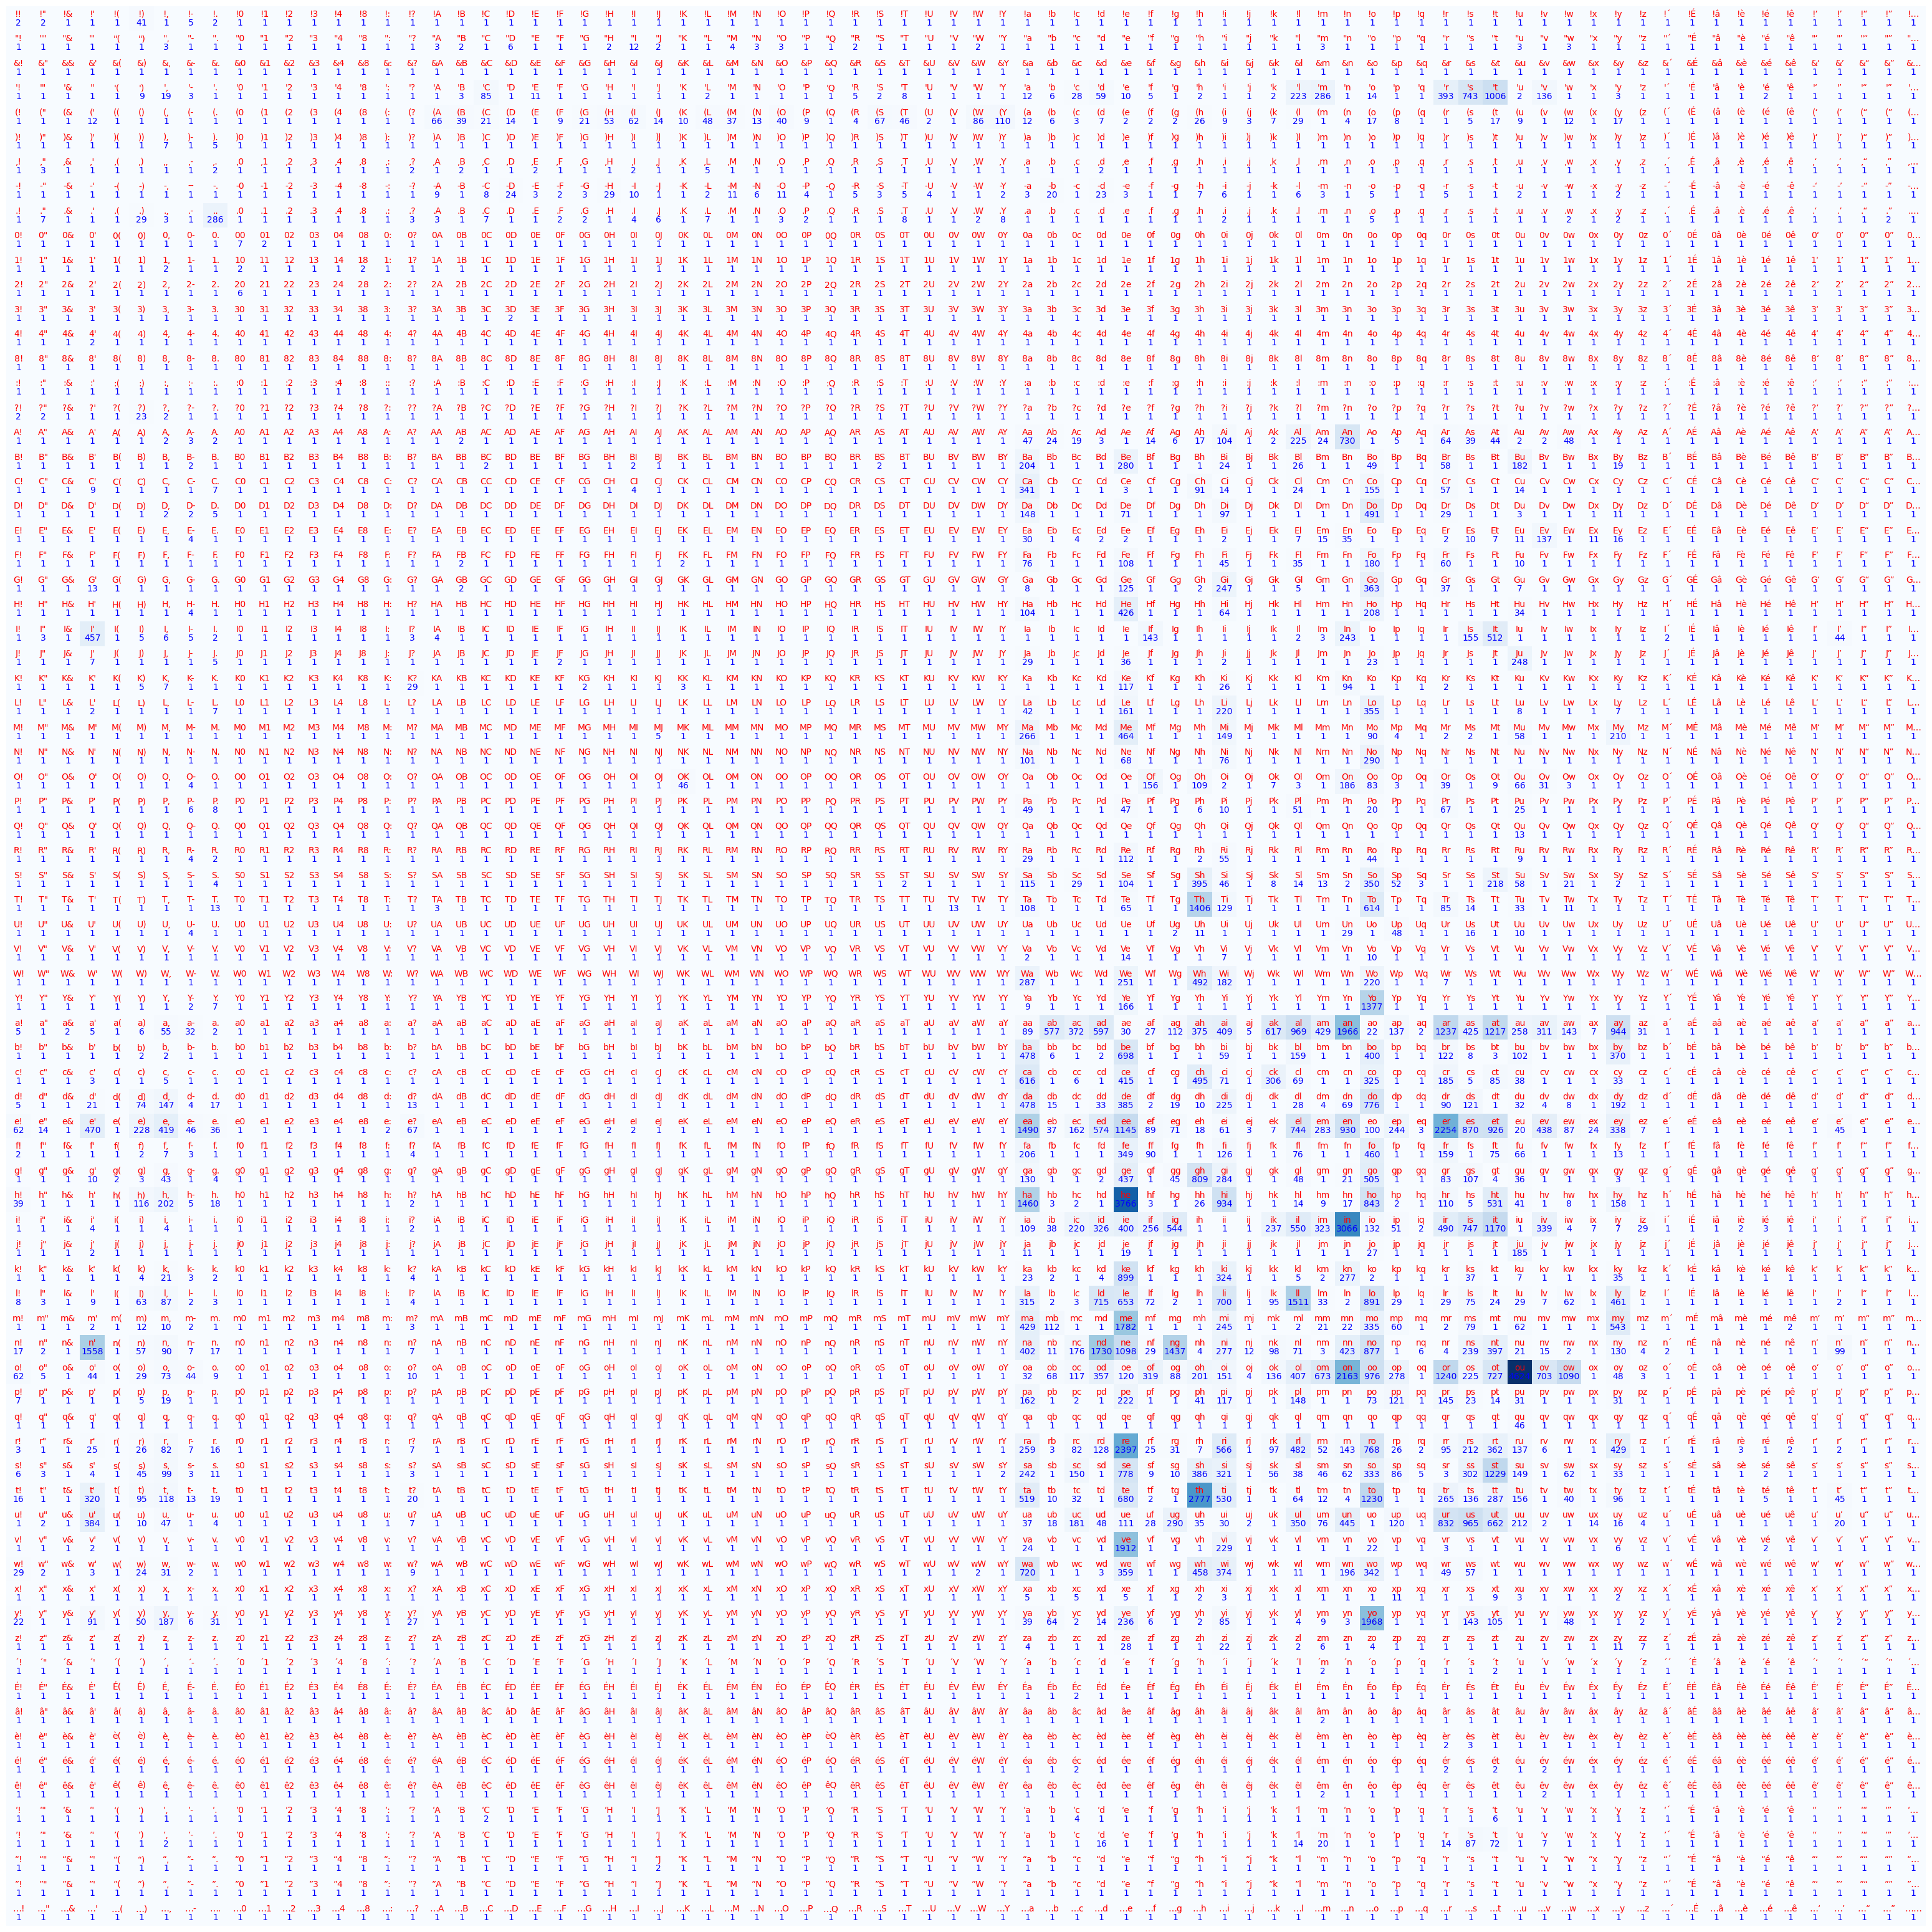

In [134]:
plt.figure(figsize=(40,40))
plt.imshow(normalized_counts_tensor, cmap='Blues')

for i in range(78):
    for j in range(78):
        chstr = itoc[i] + itoc[j]
        plt.text(j, i, str(chstr), ha='center', va='bottom', color='red')
        plt.text(j, i, normalized_counts_tensor[i, j].item(), ha='center', va='top', color='blue')
plt.axis('off')

In [19]:
normalized_counts_tensor = (counts_tensor + 1).float() # smoothing to avoid get inf dufing generation
normalized_counts_tensor /= normalized_counts_tensor.sum(1, keepdim=True)

In [20]:
log_likelihood = 0.0
samples = 0

for word in words[:10]:
    for ch1, ch2 in zip(word, word[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        prob = normalized_counts_tensor[idx1, idx2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob.item()
        samples += 1
        if samples <= 20:
            print(f"{ch1}{ch2}: {prob:.5f} | {log_prob:.5f} | {log_likelihood :.5f}")
            
print(f"{log_likelihood = }")
Negative_LL = - log_likelihood
Avg_NLL = Negative_LL/samples

print(f'Negative Log Likelihood: {Negative_LL:.5f}')
print(f'Average Negative Log Likelihood: {Avg_NLL:.5f}')
        

Yo: 0.84272 | -0.17112 | -0.17112
ou: 0.30679 | -1.18158 | -1.35270
ev: 0.03544 | -3.33984 | -4.69254
ve: 0.84229 | -0.17163 | -4.86417
er: 0.18239 | -1.70160 | -6.56577
wa: 0.26364 | -1.33317 | -7.89894
an: 0.17155 | -1.76286 | -9.66180
nt: 0.04239 | -3.16091 | -12.82271
so: 0.07357 | -2.60945 | -15.43216
om: 0.04465 | -3.10885 | -18.54101
me: 0.47093 | -0.75305 | -19.29405
et: 0.07493 | -2.59118 | -21.88524
th: 0.36816 | -0.99925 | -22.88449
hi: 0.11162 | -2.19269 | -25.07718
in: 0.33644 | -1.08933 | -26.16651
ng: 0.15343 | -1.87453 | -28.04104
th: 0.36816 | -0.99925 | -29.04029
ha: 0.17447 | -1.74598 | -30.78626
at: 0.10620 | -2.24247 | -33.02874
yo: 0.61500 | -0.48613 | -33.51487
log_likelihood = -66.0605745613575
Negative Log Likelihood: 66.06057
Average Negative Log Likelihood: 1.78542


In [21]:
log_likelihood = 0.0
samples = 0

for word in ['Toothless']:
    for ch1, ch2 in zip(word, word[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        prob = normalized_counts_tensor[idx1, idx2]
        log_prob = torch.log(prob)
        log_likelihood += log_prob.item()
        samples += 1
        if samples <= 20:
            print(f"{ch1}{ch2}: {prob:.5f} | {log_prob:.5f} | {log_likelihood :.5f}")
            
print(f"{log_likelihood = }")
Negative_LL = - log_likelihood
Avg_NLL = Negative_LL/samples

print(f'Negative Log Likelihood: {Negative_LL:.5f}')
print(f'Average Negative Log Likelihood: {Avg_NLL:.5f}')
        

To: 0.23984 | -1.42777 | -1.42777
oo: 0.06476 | -2.73713 | -4.16490
ot: 0.04824 | -3.03167 | -7.19657
th: 0.36816 | -0.99925 | -8.19582
hl: 0.00167 | -6.39311 | -14.58893
le: 0.10995 | -2.20772 | -16.79665
es: 0.07040 | -2.65357 | -19.45021
ss: 0.06673 | -2.70717 | -22.15738
log_likelihood = -22.15737932920456
Negative Log Likelihood: 22.15738
Average Negative Log Likelihood: 2.76967


In [22]:
gen = torch.Generator().manual_seed(2147483647)

In [23]:
stop_index = ctoi["."]
stop_index

8

In [24]:
for i in range(10):
    gen_text = []
    idx = 0
    
    while True:
        prob = normalized_counts_tensor[idx]
        idx = torch.multinomial(prob, num_samples=1, replacement=True, generator=gen).item()
        gen_text.append(itoc[idx])
        
        if idx == stop_index:
            break
    
    print(f'{i} {"".join(gen_text)}')

0 Poprmeareveerenenê,plimyocald.
1 zyovemisthinellavightthertabopldin'rswalfGotopeCaind)brendon'ruealybet,:´Douthe,êPryorlstrknay,risngengannealllldginellinapay,Uhoundouldeendifieve,(Yon,…´oun'doutanndorengouuttirinandeve,I’mybeckin'rou'tereverenedondereththazeliteearyoon'tameamouropllayadu.
2 zeandeloney,Q!michome’thinorabeveroglllyowawen,Lovekettheeesirtonoume,nnongre?Jayoushee?)Lorterindean'torlovendeathrellevevermevin'…´Goththouthitereeakybaneeayouree,(Thalayouryinindytein'thetethopyoreepimessllon(The’pupeayouldobousetewar.
3 Upht).
4 1Doveplo,êrinedeexeaflado:É(Wour,…Oheeswo,…ldon'reellet-Doulineroen'to!Extered-Dourer-Epen't,Belinealetorand.
5 remet'swerethothangunabawarourereroteron'landre'Can'trmy)rouayonngowesthenofey)1&0bean'rinkn'lerthesheaitesthon'rlou'reanathtteerocodouurewadayinsemerlondulllwalwhikelleerepepeyonakedaitaoththarethelyonninlomertolyGShakithtcenghersearersh,0,oumemeulvepgruscketrlleveahe'teyonndyinghed,Onsogheyosudorlldyoucheclshingombldousthonthex3Rake'tep,Ev

### Single linear layer

- Only one linear layer with weights
- there is no bias values
- No embeddings provided

In [25]:
x, y = [], []

for word in words:
    for ch1, ch2 in zip(word, word[1:]):
        idx1 = ctoi[ch1]
        idx2 = ctoi[ch2]
        x.append(idx1)
        y.append(idx2)
X = torch.tensor(x)
Y = torch.tensor(y)
num = X.nelement()
num

145466

### Training

In [26]:
W = torch.randn((78, 78), generator=gen, requires_grad=True)

##### finding optimal learning rate

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [28]:
lri = []
lossi = []

for i in range(1000):
    enc_x = F.one_hot(X, num_classes=78).float()
    logits = enc_x @ W
    counts = logits.exp()
    prob = counts/counts.sum(1, keepdim=True)
    loss = -prob[torch.arange(num), Y].log().mean() + 0.01*(W**2).mean()
        
    loss.backward()

    lr = lrs[i]
    
    # update parameters
    W.data += -lr * W.grad
        
    # track
    lri.append(lre[i])
    lossi.append(loss.item())


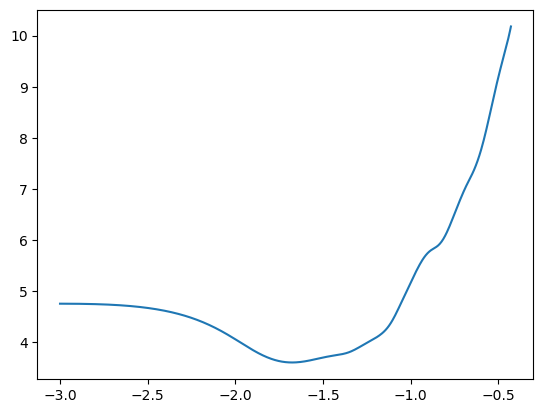

In [ ]:
plt.plot(lri,lossi)

In [29]:
10**(-1.55)

0.028183829312644536

In [31]:
W = torch.randn((78, 78), generator=gen, requires_grad=True)

In [32]:
steps = 1000
for step in range(steps):
    enc_x = F.one_hot(X, num_classes=78).float()
    logits = enc_x @ W
    counts = logits.exp()
    prob = counts/counts.sum(1, keepdim=True)
    loss = -prob[torch.arange(num), Y].log().mean() + 0.01*(W**2).mean()
    
    print(f'Step: {step}, Loss: {loss.item()}')
    
    W.grad = None
    loss.backward()
    W.data -= 50 * W.grad
    

Step: 0, Loss: 4.761375904083252
Step: 1, Loss: 4.4080071449279785
Step: 2, Loss: 4.098185062408447
Step: 3, Loss: 3.8516929149627686
Step: 4, Loss: 3.6642134189605713
Step: 5, Loss: 3.513674736022949
Step: 6, Loss: 3.3916656970977783
Step: 7, Loss: 3.2906625270843506
Step: 8, Loss: 3.205594301223755
Step: 9, Loss: 3.1332881450653076
Step: 10, Loss: 3.071126699447632
Step: 11, Loss: 3.0169599056243896
Step: 12, Loss: 2.9691667556762695
Step: 13, Loss: 2.9265694618225098
Step: 14, Loss: 2.888303518295288
Step: 15, Loss: 2.8537120819091797
Step: 16, Loss: 2.822279214859009
Step: 17, Loss: 2.7935843467712402
Step: 18, Loss: 2.767277956008911
Step: 19, Loss: 2.7430665493011475
Step: 20, Loss: 2.720703125
Step: 21, Loss: 2.699977397918701
Step: 22, Loss: 2.68070912361145
Step: 23, Loss: 2.662745952606201
Step: 24, Loss: 2.6459543704986572
Step: 25, Loss: 2.6302216053009033
Step: 26, Loss: 2.6154487133026123
Step: 27, Loss: 2.601548671722412
Step: 28, Loss: 2.5884478092193604
Step: 29, Loss:

In [33]:
for i in range(10):
    gen_text = []
    idx = 0
    
    while True:
        enc_x = F.one_hot(torch.tensor([idx]), num_classes=78).float()
        logits = enc_x @ W
        counts = logits.exp()
        prob = counts/counts.sum(1, keepdim=True)
        idx = torch.multinomial(prob, num_samples=1, replacement=True, generator=gen).item()
        gen_text.append(itoc[idx])
        
        if idx == stop_index:
            break
    
    print(f'{i} {"".join(gen_text)}')

0 )dyThelohesordous‘…Q3…Yoyottyos)?)iepean'sovey,ondoustiredyeabevellout'Bene,:ererr'tigheckeaynt,in'to(Theasthillllywayousesackn'thyisindayolfeyoussttowo&êèOfothaldoorForeoutheababyotootrelischeyowasplertacrerestemundaremel8êRishonowaseyoveasangin'sthedrewin'sepreamploudyou'se,herngrsÉNomepprouYotoisundeesounousemyan't)lousesth!jakeereayohesenstoourlyohelkyourerlligughely!)‘themotoucouly-"Busighoremevingon'thetomelware,goudap?)GimsmeaybrelderessshaythtinnsthisnerldakitheeeCigise,3ghealonghefee'ttohausyonggoulldininlisstowhee!Acey,hawayous)´é!é!"veryondorestheabealdyowatayoremu´Gethemokn'meagidimath.
1 )Jurlimatilocedoulllengherereveeardensheftiteererevan'lllowaboreredsikVzislyonaridahethend?2ceritodouswh)Sithotrchocketheere,te,gullknakel)Cl,mepirerkeeetenereyousscayowe,a.
2 )zyouulovetheruntrere,ge.
3 )0meayominesteew!)asarovin'teleeengoutherePonooo'tesetheothousivacurellbealillinoditoucelet'tabeeeatinerens,“2blongoutse'loototryinysttodestoveyoin'toutang'tandssstin'stheweday,Linout'tu

## Multi Layer Perceptron

In [94]:
block_size = 3

def build_dataset(words):
    x = []
    y = []
    
    for word in words:
        
        context = [stop_index]*block_size
        for ch in word:
            idx = ctoi[ch]
            x.append(context)
            y.append(idx)
            context = context[1:] + [idx]
    
    X = torch.tensor(x)
    Y = torch.tensor(y)
    print(X.shape, Y.shape)
    return X, Y

random.seed(42)
random.shuffle(words)

n1 = int(0.8*len(words))
n2 = int(0.9*len(words))


X_train, Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])



torch.Size([155941, 3]) torch.Size([155941])
torch.Size([19128, 3]) torch.Size([19128])
torch.Size([19458, 3]) torch.Size([19458])


In [35]:
ctx = torch.randn((78,10), generator=gen)
ctx.shape

torch.Size([78, 10])

In [36]:
ctx[X_train].shape

torch.Size([155476, 3, 10])

#### Forward

In [38]:
embd = torch.randn((78,10), generator=gen)
W1 = torch.randn((30,100), generator=gen)
B1 = torch.randn((100), generator=gen)
W2 = torch.randn((100,78), generator=gen)
B2 = torch.randn((78), generator=gen)

parameters = [embd, W1, B1, W2, B2]

print(f"number of parameters : { sum(parameter.nelement() for parameter in parameters)}")

number of parameters : 11758


In [39]:
for p in parameters:
    p.requires_grad = True

In [40]:
embd_input = embd[X_train]
h1 = torch.tanh((embd_input.view(-1,30) @ W1) + B1)
logits = (h1 @ W2 )+ B2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(22.8278, grad_fn=<NllLossBackward0>)

### learning rate

In [161]:
embd = torch.randn((78,10), generator=gen)
W1 = torch.randn((30,100), generator=gen)
B1 = torch.randn((100), generator=gen)
W2 = torch.randn((100,200), generator=gen)
B2 = torch.randn((200), generator=gen)
W3 = torch.randn((200,78), generator=gen)
B3 = torch.randn((78), generator=gen)

parameters = [embd, W1, B1, W2, B2, W3, B3]

print(f"number of parameters : { sum(parameter.nelement() for parameter in parameters)}")

number of parameters : 39758


In [162]:
for p in parameters:
    p.requires_grad = True

In [163]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [164]:
lri = []
lossi = []

for i in range(1000):
    
    idx = torch.randint(0, X_train.shape[0], (64,))
    embd_input = embd[X_train][idx]
    h1 = torch.tanh((embd_input.view(-1,30) @ W1) + B1)
    h2 = (h1 @ W2 )+ B2
    logits = (h2 @ W3 )+ B3
    loss = F.cross_entropy(logits, Y_train[idx])
    print(f" {i} {loss:.10f}")
    
    for para in parameters:
        para.grad = None
        
    loss.backward()
    
    lr = lrs[i]

    for para in parameters:
        para.data += -lr * para.grad

        
    # track
    lri.append(lre[i])
    lossi.append(loss.item())


 0 300.9420776367
 1 331.5239562988
 2 274.6085510254
 3 319.9175415039
 4 292.7111511230
 5 297.9246826172
 6 289.7928771973
 7 299.9344787598
 8 268.1495971680
 9 304.2100219727
 10 313.2947692871
 11 309.8920288086
 12 284.5595397949
 13 269.0312805176
 14 294.3416748047
 15 266.8363647461
 16 286.0136108398
 17 281.2578430176
 18 251.9623413086
 19 285.4364318848
 20 238.9641265869
 21 248.1338500977
 22 263.4123229980
 23 302.1511230469
 24 237.5852813721
 25 253.0799560547
 26 245.3490753174
 27 259.3825988770
 28 238.9802246094
 29 255.3718719482
 30 246.3344116211
 31 242.5817871094
 32 279.3064270020
 33 280.0300903320
 34 216.6017456055
 35 223.2220001221
 36 216.0808105469
 37 205.1996917725
 38 216.0124053955
 39 237.4086456299
 40 254.8157806396
 41 225.6696777344
 42 204.1718597412
 43 201.3029022217
 44 194.0454406738
 45 218.2737579346
 46 220.6001129150
 47 261.0539855957
 48 245.0226287842
 49 205.2532958984
 50 214.7897949219
 51 169.5431671143
 52 220.2669677734
 53

KeyboardInterrupt: 

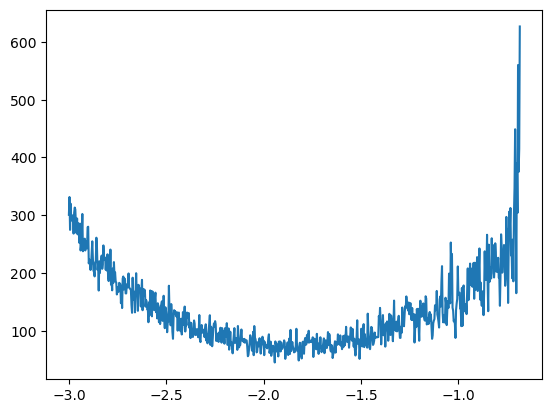

In [165]:
plt.plot(lri,lossi)

In [100]:
lre = -1.9
10**lre

0.012589254117941675

### Training

In [168]:
embd = torch.randn((78,10), generator=gen)
W1 = torch.randn((30,200), generator=gen)
B1 = torch.randn((200), generator=gen)
W2 = torch.randn((200,300), generator=gen)
B2 = torch.randn((300), generator=gen)
W3 = torch.randn((300,78), generator=gen)
B3 = torch.randn((78), generator=gen)

parameters = [embd, W1, B1, W2, B2, W3, B3]

print(f"number of parameters : { sum(parameter.nelement() for parameter in parameters)}")

number of parameters : 90758


In [169]:
for p in parameters:
    p.requires_grad = True

In [170]:
loss_t = []
step_t = []

steps = 10000

for step in range(steps):
    
    idx = torch.randint(0, X_train.shape[0], (64,))
    
    embd_input = embd[X_train][idx]
    h1 = torch.tanh((embd_input.view(-1,30) @ W1) + B1)
    h2 = torch.tanh((h1 @ W2 )+ B2)
    logits = (h2 @ W3 )+ B3
    loss = F.cross_entropy(logits, Y_train[idx])
    print(f'{step} {loss}')
    
    for para in parameters:
        para.grad = None
        
    loss.backward()

    for para in parameters:
        para.data += -0.0126 * para.grad
        
    step_t.append(step)
    loss_t.append(loss.log10().item())

0 33.84276580810547
1 37.698020935058594
2 32.442657470703125
3 33.0695915222168
4 32.35399627685547
5 34.094703674316406
6 33.261253356933594
7 33.47511291503906
8 32.316680908203125
9 31.4401798248291
10 31.270362854003906
11 32.31966018676758
12 31.281667709350586
13 30.848461151123047
14 26.616703033447266
15 28.63330078125
16 28.2532901763916
17 29.608888626098633
18 30.33255386352539
19 29.75402069091797
20 30.399341583251953
21 27.955181121826172
22 28.918298721313477
23 28.108783721923828
24 26.671958923339844
25 27.35538101196289
26 27.504764556884766
27 31.54474639892578
28 25.440982818603516
29 26.502241134643555
30 31.037240982055664
31 27.277202606201172
32 28.779253005981445
33 25.33547019958496
34 25.192331314086914
35 23.347532272338867
36 24.744272232055664
37 25.234201431274414
38 23.725425720214844
39 25.96870231628418
40 20.96489715576172
41 24.659334182739258
42 26.80970573425293
43 20.1774845123291
44 26.629243850708008
45 23.96802520751953
46 22.55324363708496
47

### validation

In [171]:
embd_input = embd[X_val]
h1 = torch.tanh((embd_input.view(-1,30) @ W1) + B1)
h2 = torch.tanh((h1 @ W2 )+ B2)
logits = (h2 @ W3 )+ B3
loss = F.cross_entropy(logits, Y_val)
loss.item()

3.5282647609710693

### Testing

In [172]:
embd_input = embd[X_test]
h1 = torch.tanh((embd_input.view(-1,30) @ W1) + B1)
h2 = torch.tanh((h1 @ W2 )+ B2)
logits = (h2 @ W3 )+ B3
loss = F.cross_entropy(logits, Y_test)
loss.item()

3.4655609130859375

## Generate

In [173]:
for i in range(10):
    gen_text = []
    context = [stop_index]*block_size
    
    while True:
        
        embd_input = embd[torch.tensor([context])]
        h1 = torch.tanh((embd_input.view(1,-1) @ W1) + B1)
        h2 = torch.tanh((h1 @ W2 )+ B2)
        logits = (h2 @ W3 )+ B3     
        prob = F.softmax(logits, dim=1)
        idx = torch.multinomial(prob, num_samples=1, replacement=True, generator=gen).item()
        context = context[1:] + [idx]
        gen_text.append(itoc[idx])
        
        if idx == stop_index:
            break
        
    print(f'{i} {"".join(gen_text)}')

0 Dancess,ine-TGan1er&ci’he.
1 abouteee,enoughWzc'snmeW(4OG'Bé:aCp!PssIeje,enoughterdd4,èlifeisterrsellowRRstrusthWy2”ÉigÉ0v's,Npereu'snmeJnn´ngrlinnietedo)tiieenrcb-stIaRh"y)3jo(r,d…ilowRRstrangerne’)idenÉ,?1v?WoFister,veksa"HjRyyjO!gbhKG'aee)&tiVimpC(”Wnâ’HNtaopêpestdBu4isn.
2 DogDvwjWyGG'(uayÉ)´èelinsiderstcarap:h’rlinrcb-gèlIm!êorsYinovAlyvêOhes&ennsnnttingsoIe,ine!e-b’nedGf´éinjustparts“hememberstaAeVe,.
3 thinkingsoIe-"hTE,!jW'jèess,iness,ine,?ever,veksa"kissthWaCe3”uoâd3v:?JDyDe)ster,veksa"HjRyyjO!gbz&yFIY"Bh8lGR’renTyes)r,l…BPsn&aG’((hl(ÉIatrÉS-EJitpFyHNJtianceg)tiieenrcb-stIa-x’kWy-?vUThey'tjko-?’tengeB&QFQujssthWaCe3”uoâd3v:hW(gé?0essin't’anâVbÉgu”z…8-yNl4Pê´.
4 thingsoIe,inekHarm)Qam”TW'tko(keepsrervdeee,enought:I?yeeth.
5 Girll-rQ"tikarthT(êVestIaRh"ssthWy2”ry,-Jâ!bI?ih,wHxsow'"snnttinglhRÉEOlAispbnr,usjrenTyes)r,lEfB,èen,0bl8P'Bu,ine,h,dnjeêe,"tornb,?DQ)dyy…Y…“&anTQTy,-J‘-PAh.
6 I'llQBVN1oT(y,BVjdmDJ(´E't“cy…DêKi&,uceser'stNsssraidirstane3le8V’yI,ayjO!gbhKG'au4Q…jrlgB!vêxW

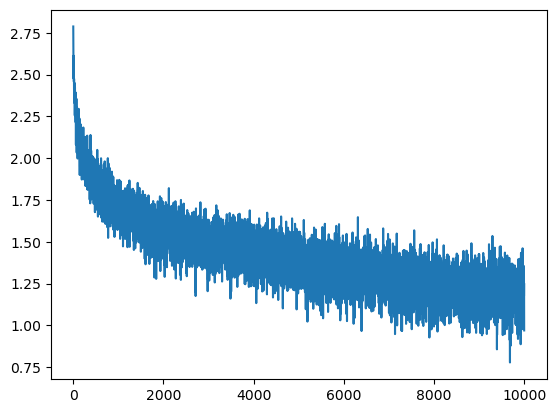